# Introducción

Author: Uriel Sandoval

## Programación lineal

### Problema de la aerolínea

Una aerolínea ofrece dos tipos de boletos: clase turística y primera clase. El boleto en clase turística cuesta \\$200 y el de primera clase \\$300. ¿Cuántos boletos de cada clase debe de vender la aerolínea para maximizar sus ingresos?


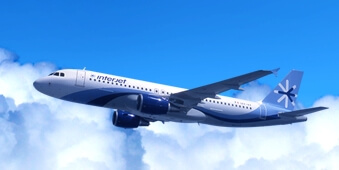

Podemos empezar difiniedo $a$ como el número de boletos de clase turista y $b$ como el números de boletos de primera clase. Entonces, los incresos totales $P\left(a, b\right)$ serán:




$$ P\left(a, b\right) = 200 a + 300b $$


Podemos empezar importando el paquete *Plots* para graficar la función $P\left(a,b\right)$,

In [4]:
using Plots;
plotly();

In [14]:
# Definimos los costos de cada boleto
ca = 200
cb = 300

# Consideramos 50 asientos como prueba inicial.
a = range(0,50,step=5)
b = range(0,50,step=5)

# Definimos la función objetivo
P(a, b) = ca*a + cb*b

contour(a,b,(a,b)->P(a,b),nlevels=20, c=:heat, linewidth=10, colorbar = false, contour_labels = true)
xaxis!("Asientos clase turista (a)")
yaxis!("Asientos en primera clase (b)")
title!("Lineas gradiente a la función objetivo")

<!DOCTYPE html>
 
 
 Plots.jl

#### Primera restricción

Ahora bien, la primera restricción que tenemos es meramente física: la capacidad del avión es de máximo 50 pasajeros. ¿Cómo impacta esto al problema inicial?


Matemáticamente esta restricción se puede representar como:

$$ a + b \leq 50 $$ 



In [19]:
contour(a,b,(a,b)->P(a,b),nlevels=20, c=:heat, linewidth=10, colorbar = false, contour_labels = true)
areaplot!(a, (50 .- a), legend=false, opacity=0.3, color=:green)
scatter!([50 0],[0 50])

xaxis!("Asientos clase turista (a)")
yaxis!("Asientos en primera clase (b)")
title!("Lineas gradiente a la función objetivo")

<!DOCTYPE html>
 
 
 Plots.jl

De la gráfica podemos observar que la región factible (en color verde) está marcada por triángulo en el cual dos de sus vértices son candidatos a ser el valor óptimo a la solución del problema.

In [20]:
@show P(50,0);
@show P(0,50);

P(50, 0) = 10000
P(0, 50) = 15000


#### Restricciones de espacio

Por distribución de acientos la aerolínea tiene las siguientes restricciones:

    * El avión puede llevar un máximo de 20 asientos de primera clase.
    * De igual forma, sólo existen 40 asientos en la clase turista.
    
Estas restricciones se establecen como:


$ a \leq 40 \\
  b \leq 20 $

In [22]:
contour(a,b,(a,b)->P(a,b),nlevels=20, c=:heat, linewidth=10, colorbar = false, contour_labels = true)
areaplot!(a, (50 .- a), legend=false, opacity=0.2, color=:green)
areaplot!(a[a.<=40], repeat([maximum(b)],length(a[a.<=40])), c=:blue, legend=false, opacity=0.15)
areaplot!([0, 50, 50], [20, 20, 0], c=:red, legend=false, opacity=0.15)


xaxis!("Asientos clase turista (a)")
yaxis!("Asientos en primera clase (b)")
title!("Lineas gradiente a la función objetivo")

<!DOCTYPE html>
 
 
 Plots.jl

In [23]:
contour(a,b,(a,b)->P(a,b),nlevels=20, c=:heat, linewidth=10, colorbar = false, contour_labels = true)
areaplot!(a, (50 .- a), legend=false, opacity=0.2, color=:green)
areaplot!(a[a.<=40], repeat([maximum(b)],length(a[a.<=40])), c=:blue, legend=false, opacity=0.15)
areaplot!([0, 50, 50], [20, 20, 0], c=:red, legend=false, opacity=0.15)
scatter!([40 40 30 0],[0 10 20 20])


xaxis!("Asientos clase turista (a)")
yaxis!("Asientos en primera clase (b)")
title!("Lineas gradiente a la función objetivo")

<!DOCTYPE html>
 
 
 Plots.jl

In [36]:
@show f(0, 20);
@show f(30, 20);
@show f(40, 10);
@show f(40, 0);

f(0, 20) = 6000
f(30, 20) = 12000
f(40, 10) = 11000
f(40, 0) = 8000


#### Solución gráfica

Observando la figura la solución que optimiza el beneficio de la aerolínea es en la intersección de las restricciones relacionas con la capacidad total y los asientos disponibles en primera clase. Esto se puede expresar como siguiente sistema de ecuaciones lineales:



$$
\begin{align}
b &= 20 \\
a+b &= 50
\end{align}
$$

Utilizando sutitución podemos resolver el sistema:

$$
\begin{align}
a &= 30 \\
b&= 20
\end{align}
$$



In [25]:
@show P(30, 20);

P(30, 20) = 12000


#### Restricción adicional

Consideremos la siguiente restricción:

$$ 1.8a + b \leq 70 $$

In [26]:
contour(a,b,(a,b)->P(a,b),nlevels=20, c=:heat, linewidth=10, colorbar = false, contour_labels = true)
areaplot!(a, (50 .- a), legend=false, opacity=0.2, color=:green)
areaplot!(a[a.<=40], (70 .- 1.8*a[a.<=40]), legend=false, opacity=0.1, color=:black)

areaplot!(a[a.<=40], repeat([maximum(b)],length(a[a.<=40])), c=:blue, legend=false, opacity=0.15)
areaplot!([0, 50, 50], [20, 20, 0], c=:red, legend=false, opacity=0.15)



xaxis!("Asientos clase turista (a)")
yaxis!("Asientos en primera clase (b)")
title!("Lineas gradiente a la función objetivo")

<!DOCTYPE html>
 
 
 Plots.jl

En este caso la solución óptima es la intersección de la capacidad de los asientos de primera clase y la nueva restricción. Esta intersección es representanda por el siguiente sistema de ecuaciones lineales:



$$ 
\begin{align}
b &= 20 \\
1.8a+b &= 70
\end{align}
$$

Resolviendo obtenemos:

$$
\begin{align}
a &= 27.77777 \\
b&= 20
\end{align}
$$


In [30]:
contour(a,b,(a,b)->P(a,b),nlevels=20, c=:heat, linewidth=10, colorbar = false, contour_labels = true)
areaplot!(a, (50 .- a), legend=false, opacity=0.2, color=:green)
areaplot!(a[a.<=40], (70 .- 1.8*a[a.<=40]), legend=false, opacity=0.1, color=:black)

areaplot!(a[a.<=40], repeat([maximum(b)],length(a[a.<=40])), c=:blue, legend=false, opacity=0.15)
areaplot!([0, 50, 50], [20, 20, 0], c=:red, legend=false, opacity=0.15)
scatter!([38.888 27.7777 0],[0 20 20])

xaxis!("Asientos clase turista (a)")
yaxis!("Asientos en primera clase (b)")
title!("Lineas gradiente a la función objetivo")

<!DOCTYPE html>
 
 
 Plots.jl

In [31]:
contour(a,b,(a,b)->P(a,b),nlevels=20, c=:heat, linewidth=10, colorbar = false, contour_labels = true)
areaplot!(a, (50 .- a), legend=false, opacity=0.2, color=:green)
areaplot!(a[a.<=40], (70 .- 1.8*a[a.<=40]), legend=false, opacity=0.1, color=:black)

areaplot!(a[a.<=40], repeat([maximum(b)],length(a[a.<=40])), c=:blue, legend=false, opacity=0.15)
areaplot!([0, 50, 50], [20, 20, 0], c=:red, legend=false, opacity=0.15)


for a1 in 0:38
    bmax = min(20,  floor(Int, 70 - 1.8*a1))
    scatter!([repeat([a1], bmax+1)],[0:bmax], markerstrokewidth=0,markersize=3, markercolor="blue")
end



xaxis!("Asientos clase turista (a)")
yaxis!("Asientos en primera clase (b)")
title!("Lineas gradiente a la función objetivo")



<!DOCTYPE html>
 
 
 Plots.jl

In [35]:
@show f(28, 19)
@show f(27, 20)

f(28, 19) = 11300
f(27, 20) = 11400

11400

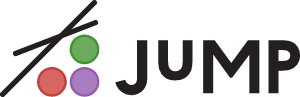

## JuMP

[JuMP](https://jump.dev/JuMP.jl/stable/) ("Julia for Mathematical Programming") es un lenguaje de modelado algebráico open source. JuMP forma parte de las librerías instalables de Julia. Al estar desarrollado en Julia, aprovecha las capacidades de un lenguaje multipropósito, permitiendo extraer, modificar y procesar los datos enviados al solver de una forma óptima y en el mismo código. 

JuMP permite formular fácilmente problemas de optimización lineal (LP), no-lineal (NLP), enteros (MILP), entre otros. Estos problemas son formulados dentro de Julia y enviados a través de una interfaz a un solver que pueda resolver este tipo de problemas. JuMP nos da acceso a los resultados y a otro tipo de información arrojada por el solver a través de la interfaz [MathOptInterface](https://github.com/jump-dev/MathOptInterface.jl).


### Instalación

JuMP es fácilmente instalable desde el manejador de paquetes de Julia:

```Julia
import Pkg;
Pkg.add("JuMP")
```

Adicional a la instalación de JuMP, es necesario tener instalado un solver que nos permita obtener la solución al tipo de problema que estamos manejando. Todos los solvers disponibles están enlistados en la [página de JuMP](https://jump.dev/JuMP.jl/stable/installation/#Getting-Solvers-1)

```Julia
Pkg.add("GLPK")
```


## Solución al problema de la aeroínea utilizando JuMP

Teniendo instalado JuMP y el solver GLPK. Podemos formular el problema de la aerolínea como un problema de optimización lineal con variables enteras (MILP):

$$
\begin{align}
 \max \quad & 200a + 300b \\
 \text{s.t.} \quad & a + b \leq 50\\
 & a \leq 40 \\
 & b \leq 20 \\
 & 1.8a + b \leq 70 \\
 & a \geq 0 \\
 & b \geq 0 \\
 & a, b \in \mathbb{Z}
\end{align}
$$

In [76]:
# Importamos JuMP y el solver
using JuMP, GLPK;

In [77]:
mod = Model(GLPK.Optimizer) # Definimos el modelo

@variable(mod, a >= 0, Int) # Definimos las variables para los asientos de
@variable(mod, b >= 0, Int) # primera clase y turista. Variables enteras!!

@constraints(mod, begin
    a + b <= 50       # Restricción de capacidad de pasajeros
    a <= 40           # Restricción de clase turista
    b <= 20           # Restricción de primera clase
    1.8*a + b <=70    # Restricción adicional
    end)

@objective(mod, Max, 200*a +300*b);  # Función objetivo


Podemos imprimir el modelo para asegurarnos que lo hemos introducido corréctamente:

In [78]:
mod

A JuMP Model
Maximization problem with:
Variables: 2
Objective function type: GenericAffExpr{Float64,VariableRef}
`GenericAffExpr{Float64,VariableRef}`-in-`MathOptInterface.LessThan{Float64}`: 4 constraints
`VariableRef`-in-`MathOptInterface.GreaterThan{Float64}`: 2 constraints
`VariableRef`-in-`MathOptInterface.Integer`: 2 constraints
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: GLPK
Names registered in the model: a, b

Resolviendo

In [79]:
optimize!(mod)

In [80]:
@show value.(a)
@show value.(b)
@show objective_value(mod)

value.(a) = 27.0
value.(b) = 20.0
objective_value(mod) = 11400.0


11400.0